In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%run -i '../../../../utils.py'

# Get data

In [169]:
# read meta data
df_meta = pd.read_excel('../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta.head()

,MiceID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [170]:
# read SCFA data
df_scfa = pd.read_excel('../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [171]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,108301.701888,7101.750943,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,0.0,405068.034693,50064.588558,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,0.0,36169.603950,45332.570284,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,0.0,484302.054587,10150.043060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,0.0,91489.970533,42374.302141,0.0,0.0,0.0,0.0,0.0,12519.680178,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


# Run ElasticNet

In [172]:
df_elasnet = train_scfa_dynamics_model(df_meta = df_meta, 
                                       df_bac = df_bac, 
                                       df_scfa = df_scfa, 
                                       target_scfa=['Acetate','Butyrate','Propionate'],
                                       topN=40,
                                       normalize_X=True,
                                       exclude_group=None,
                                       exclude_vendor=None,
                                       model='ElasticNet',
                                       feedback=True)
df_elasnet.head()

,SCFA,BestAlpha,BestL1Ratio,R2,Muribaculaceae,Akkermansia-muciniphila,Bacteroides-acidifaciens,Faecalibaculum,Parasutterella,Bacteroides-uniformis,...,Bacteroides-caecimuris,Lactobacillus,Anaerotruncus,Ruminococcaceae,Bilophila,Desulfovibrio,Gastranaerophilales,mouse-gut-metagenome,Helicobacter-mastomyrinus,SCFA_fdb
0,Acetate,67.489073,0.0001,0.009921,-0.003992,-0.000618,7.615555e-07,-0.000478,-0.000423,-0.000543,...,0.000000,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.039370
1,Butyrate,0.187123,0.1000,0.086243,-0.684352,-0.053832,0.000000e+00,-0.000000,-0.010948,-0.011286,...,0.000000,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.164777
2,Propionate,0.003887,1.0000,0.300275,-6.232220,0.743611,4.946225e+00,-0.846792,-6.450966,0.722566,...,15.121256,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.241516


In [173]:
df_elasnet.to_csv('elasnet_regression_w_feedback.csv')

# Run RandomForest

In [176]:
df_rf_reg, df_rf_opt_paras = train_scfa_dynamics_model(
    df_meta = df_meta, 
    df_bac = df_bac, 
    df_scfa = df_scfa, 
    target_scfa=['Acetate','Butyrate','Propionate'],
    topN=40,
    normalize_X=True,
    exclude_group=None,
    exclude_vendor=None,
    model='RandomForest',
    feedback=True)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 32.8min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 28.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 41.2min finished


In [179]:
df_rf_opt_paras.to_csv('optimal_rf_parameters_w_feedback.csv')
df_rf_reg.to_csv('rf_regression_w_feedback.csv')

In [185]:
df_rf_reg

,SCFA,R2,Muribaculaceae,Akkermansia-muciniphila,Bacteroides-acidifaciens,Faecalibaculum,Parasutterella,Bacteroides-uniformis,Bacteroides,Alloprevotella,...,Bacteroides-caecimuris,Lactobacillus,Anaerotruncus,Ruminococcaceae,Bilophila,Desulfovibrio,Gastranaerophilales,mouse-gut-metagenome,Helicobacter-mastomyrinus,SCFA_fdb
0,Acetate,0.833214,0.038964,0.019698,0.017703,0.026464,0.055075,0.019452,0.028162,0.022897,...,0.019167,0.013112,0.035926,0.031186,0.006825,0.00730,0.008344,0.014009,0.016798,0.068180
1,Butyrate,0.729337,0.088277,0.015987,0.019102,0.002870,0.001875,0.000000,0.006317,0.009686,...,0.000000,0.000000,0.001640,0.000000,0.000000,0.00000,0.002985,0.003658,0.000000,0.405877
2,Propionate,0.974006,0.067287,0.015685,0.031270,0.020374,0.062586,0.018059,0.027925,0.023733,...,0.025775,0.026785,0.012512,0.024867,0.017489,0.00927,0.008623,0.014213,0.012197,0.097935


# Plot SCFA producer and consumer

In [178]:
def plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=True, topN=10, figsize=(10,6), save=False):
    # reformat elastic net
    df_elasnet = df_elasnet.stack().reset_index()
    df_elasnet = df_elasnet[~df_elasnet.level_1.isin(['BestAlpha','BestL1Ratio','R2'])]
    df_elasnet.columns=['SCFA','Variable','Coefficient']
    df_elasnet = df_elasnet.reset_index(drop=True)

    # reformat random forest
    df_rf = df_rf.stack().reset_index()
    df_rf = df_rf[~df_rf.level_1.isin(['R2'])]
    df_rf.columns=['SCFA','Variable','Gini']
    df_rf = df_rf.reset_index(drop=True)

    # merge two tables
    df_joined = pd.merge(df_rf, df_elasnet, left_on=['SCFA','Variable'], right_on=['SCFA','Variable'], how='inner')
    df_joined.columns = ['SCFA','Taxon','RandomForest','ElasticNet']

    # remove features with ElasticNet=0
    if producer:
        df_joined = df_joined[df_joined.ElasticNet>0]
    else:
        df_joined = df_joined[df_joined.ElasticNet<0]
    all_scfa = sorted(set(df_joined.SCFA))
    
    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=len(all_scfa), constrained_layout=True, sharex=True)
    cbar_ax = fig.add_axes([0.94, .45, .015, .2])
    for k,scfa in enumerate(all_scfa):
        curr_df = df_joined[df_joined.SCFA==scfa].set_index('Taxon')
        curr_df = curr_df.drop('SCFA', axis=1)
        curr_df = curr_df.sort_values(by='RandomForest', ascending=False)
        curr_df = curr_df.iloc[0:topN,:] 

        # normalize to -1 and 1
        for c in ['ElasticNet','RandomForest']:
            if producer==False and c=='ElasticNet':
                curr_df[c] = curr_df[c]/np.abs(curr_df[c].min())
            else:
                curr_df[c] = curr_df[c]/np.abs(curr_df[c].max())

        # plot    
        _ = sns.heatmap(curr_df.values, ax=ax[k], cmap='RdBu_r', vmin=-1, vmax=1, cbar = False if k!=2 else True, cbar_ax = None if k!=2 else cbar_ax, linewidths=0.25, linecolor='black')
        ax[k].set_xticklabels(['RandomForest','ElasticNet'], rotation=90, fontsize=12)
        ax[k].set_title(scfa, fontsize=15)
        ax[k].set_yticklabels(curr_df.index, rotation=0, fontsize=12)
        ax[k].tick_params(axis=u'both', which=u'both',length=0)
        
    # save to figure
    if save:
        plt.rcParams['svg.fonttype'] = 'none'
        if producer:
            fig.savefig("scfa_producer_no_feedback_top%d.svg"%(topN), format="svg")
        else:
            fig.savefig("scfa_consumer_no_feedback_top%d.svg"%(topN), format="svg")
        
    plt.tight_layout()

## no feedback

In [ ]:
df_elasnet = pd.read_csv('elasnet_regression_no_feedback.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('rf_regression_no_feedback.csv', index_col=0).set_index('SCFA')

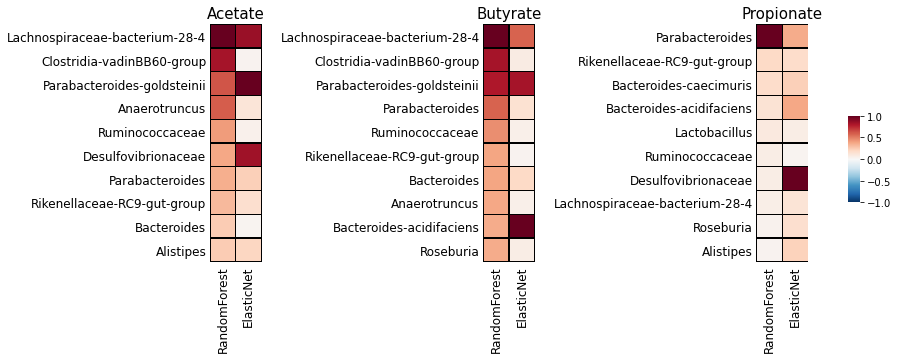

In [166]:
plot_scfa_producer_or_consumer(producer=True, figsize=(11,6), save=False)

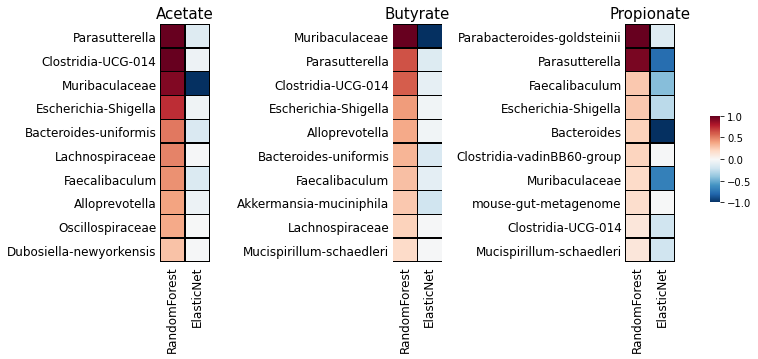

In [167]:
plot_scfa_producer_or_consumer(producer=False, figsize=(9.5,6), save=False)

## w/ feedback

In [180]:
df_elasnet = pd.read_csv('elasnet_regression_w_feedback.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('rf_regression_w_feedback.csv', index_col=0).set_index('SCFA')

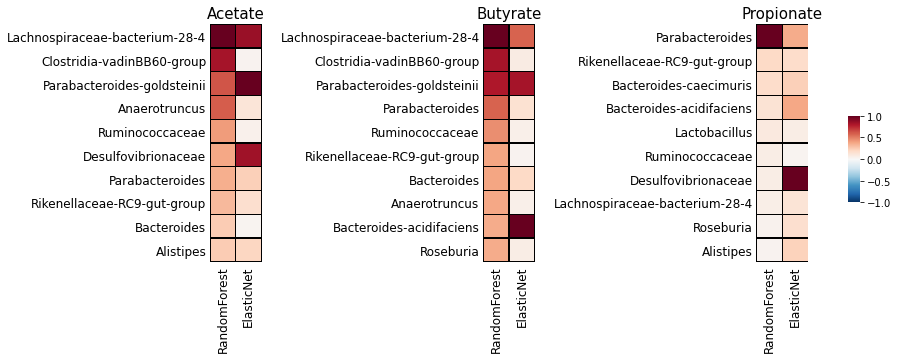

In [183]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=True, figsize=(11,6), save=False)

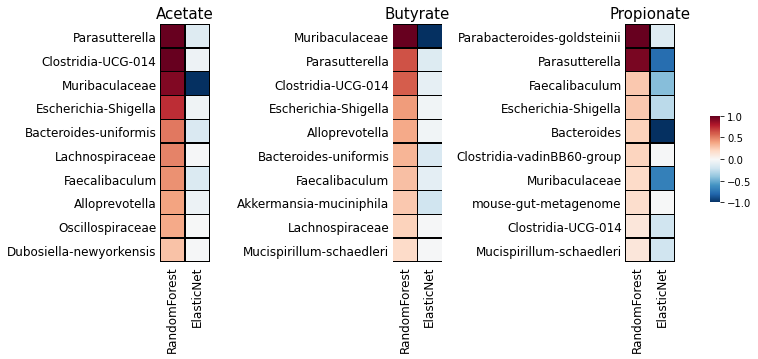

In [184]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=False, figsize=(9.5,6), save=False)